<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418 · Aprendizaje automático</p>
<p style="margin: 0; text-align:right;">Grado en Ciencia de Datos Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimédia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# PEC 6: APRENDIZAJE POR REFUERZO

## Introducción

En esta actividad estudiaremos cómo utilizar las técnicas previamente estudiadas en teoría para la resolución de problemas prácticos.

Las competencias asociadas a este módulo son las siguientes:

- Diseñar un marco experimental teniendo en cuenta los métodos más adecuados para la captura, procesamiento, almacenamiento, análisis y visualización de datos.
- Utilizar de forma combinada los fundamentos matemáticos, estadísticos y de programación para desarrollar soluciones a problemas en el ámbito de la ciencia de los datos.

Y los objetivos que perseguimos con este *notebook* de prácticas son:

- Conocer los principales métodos de aprendizaje automático en problemas de aprendizaje por refuerzo (del inglés, *Reinforcement Learning*, RL), y saber aplicar el tipo de algoritmo adecuado en cada situación, así como sus puntos fuertes y debilidades.
- Identificar los distintos elementos que aparecen en un proyecto de aprendizaje por refuerzo.
- Familiarización con librerías de programación de redes neuronales a través de ejemplos.
- Saber desarrollar una solución para un problema haciendo uso de métodos de aprendizaje por refuerzo

# Pec realizada por **Alberto Rodríguez Álvarez**

## Descripción de la PEC


El problema al que nos enfrentamos en esta PEC es el denominado [*Cliff Walking*](https://gymnasium.farama.org/environments/toy_text/cliff_walking/).

Este entorno es un mundo cuadriculado y el objetivo es cruzarlo desde el punto de partida hasta la meta evitando caer por el acantilado. Los estados describen la posición del agente en la cuadrícula y las acciones guían sus movimientos en su travesía, recibiendo recompensa negativa de -1 por el paso del tiempo y una de -100 si cae en el acantilado. Sin embargo, si el jugador se desplaza a una ubicación del acantilado, vuelve a la ubicación inicial. Revisa con atención el enlace proporcionada para familiarizarte con los detalles del entorno.


## EJERCICIO 1

En esta actividad, igual que en los ejemplos incluídos en los materiales de la asignatura, utilizaremos la API para trabajar con entornos y agentes de aprendizaje reforzado ***gym***, mantenida actualmente por el proyecto ***Gymnasium***.

https://gymnasium.farama.org/

Ejecuta la siguiente celda para instalar e importar la librería.

In [ ]:
!pip install gymnasium

In [90]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import numpy as np
import random
from moviepy.editor import ipython_display
import pandas as pd

En caso de que lo necesites, ejecuta la siguiente celda para acceder a tu Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**1.a) (0.25 PUNTOS)** Ejecuta la siguiente celda para crear el entorno y comenta el entorno creado.

In [2]:
env = gym.make('CliffWalking-v0', render_mode='rgb_array')

Se crea un entorno llamado "CliffWalking-v0", parte de Toy Text utilizando la biblioteca Gymnasium. Este entorno es un clásico problema de aprendizaje por refuerzo donde un agente debe navegar por una cuadrícula fija para alcanzar un objetivo mientras evita caer por un acantilado. El parámetro render_mode='rgb_array' especifica que el entorno debe renderizarse en un formato de imagen RGB, lo cual es útil para visualización y análisis del comportamiento del agente. En este entorno, el agente debe aprender a encontrar la ruta más segura y eficiente para llegar al objetivo evitando penalizaciones significativas por caer del acantilado.

https://gymnasium.farama.org/environments/toy_text/cliff_walking/

**1.b) (0.5 PUNTOS)** Completa las líneas de código incompletas en la celda siguiente para visualizar el número de estados del entorno, el número de acciones posibles y el rango de valores de las recompensas.

In [19]:
# ADD AND RUN YOUR CODE HERE

obs_space   = env.observation_space.n
num_actions = env.action_space.n
rwd_range   = env.reward_range

print('obs_space:', obs_space)
print('#actions:', num_actions)
print('rwd_range:', rwd_range)

obs_space: 48
#actions: 4
rwd_range: (-inf, inf)


**1.c) (0.5 PUNTOS)** Comenta brevemente la utilizad de los ***wrappers*** de ***gym***:

https://gymnasium.farama.org/api/wrappers/

Utiliza el ***wrapper RecordVideo*** sobre el entorno (***env***) configurándolo para que guarde vídeos de todos los episodios del entrenamiento.

https://gymnasium.farama.org/api/wrappers/misc_wrappers/#gymnasium.wrappers.RecordVideo

Los wrappers en Gym son herramientas que permiten modificar los entornos sin alterar el código base. Con ello se puede preprocesar las observaciones, modificar las recompensas y registrar episodios. 

Por ejemplo, gym.wrappers.RecordVideo se utiliza para grabar episodios en vídeo, lo que es útil para visualizar el comportamiento del agente y analizar su rendimiento y comportamiento. Otro ejemplo es gym.wrappers.GrayScaleObservation, que convierte las observaciones en imágenes en escala de grises y optimizar recursos.

In [31]:
#!pip install moviepy
#!pip install gymnasium[toy-text] pygame

In [34]:
from gymnasium.wrappers import RecordVideo

video_folder = './videos'
wrapped_env = RecordVideo(env, video_folder=video_folder, episode_trigger=lambda x: True)

**1.d) (0.75 PUNTOS)** Entrena el agente durante un episodio y con un máximo de 50 iteraciones (steps) en el que el agente siempre debe moverse (acción) hacia arriba.

Después, utiliza la función ***moviepy.editor.ipython_display*** para visualizar el vídeo del entrenamiento y comenta los resultados.

In [38]:
state, info = wrapped_env.reset()

max_iterations = 50
for _ in range(max_iterations):
    action = 0  # hacia arriba
    state, reward, done, truncated, info = wrapped_env.step(action)
    if done or truncated:
        break

wrapped_env.close()


Moviepy - Building video C:\Users\alber\D_Uoc\Aprendizaje Auto\R6\videos\rl-video-episode-0.mp4.
Moviepy - Writing video C:\Users\alber\D_Uoc\Aprendizaje Auto\R6\videos\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\alber\D_Uoc\Aprendizaje Auto\R6\videos\rl-video-episode-0.mp4


In [39]:
ipython_display('./videos/rl-video-episode-0.mp4')

Se crea una animación en la que unicamente vemos como el agente sube (se desplaza hacia arriba) 3 posiciones y se queda quieto ahí dado que está en el límite del mapa y este es el comportamiento que se espera dada la descripción del mapa.

**1.e) (0.5 PUNTOS)** De nuevo, entrena el agente durante un único episodio y con un máximo de 50 iteraciones (steps). Sin embargo, en este caso el agente siempre realizará un movimiento aleatorio (acción).

Después, utiliza la función ***moviepy.editor.ipython_display*** para visualizar el vídeo del entrenamiento y comenta los resultados.

In [48]:
# ADD AND RUN YOUR CODE HERE
wrapped_env = RecordVideo(env, video_folder=video_folder, episode_trigger=lambda x: True)
state, info = wrapped_env.reset()

max_iterations = 50
for _ in range(max_iterations):
    action = wrapped_env.action_space.sample() 
    state, reward, done, truncated, info = wrapped_env.step(action)
    if done or truncated:
        break

wrapped_env.close()

Moviepy - Building video C:\Users\alber\D_Uoc\Aprendizaje Auto\R6\videos\rl-video-episode-0.mp4.
Moviepy - Writing video C:\Users\alber\D_Uoc\Aprendizaje Auto\R6\videos\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\alber\D_Uoc\Aprendizaje Auto\R6\videos\rl-video-episode-0.mp4


In [49]:
ipython_display('./videos/rl-video-episode-0.mp4')

A diferencia del caso anterior, en este caso el agente/personaje cae por el precipicio unas cuantes veces como era de esperar. El movimiento aleatorio/errático provoca que caiga y vuelva a comenzar. Dado el pequeño número de iteraciones no logra alcanzar la meta.

## EJERCICIO 2

Ahora que ya nos hemos familiarizado con el entorno y su funcionamiento, implementaremos Aprendizaje-Q para entrenar el agente.

**2.a) (0.5 PUNTOS)** Completa la celda siguiente para implementar la función ***create_q_table*** que, dado el entorno, debe generar la tabla Q con las dimensiones que corresponda e inicializar sus valores con ceros.

In [57]:

def create_q_table(env):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    return q_table


In [51]:
#comprobar dimensiones
create_q_table(wrapped_env).shape

(48, 4)

In [55]:
#print(create_q_table(wrapped_env))

**2.b) (0.5 PUNTOS)** En la celda siguiente, completa la función ***get_action*** que, dado el estado, el entorno, la tabla Q y el valor de $\epsilon$ (***epsilon***), debe implementar una política $\epsilon$-*greedy* y devolver la acción correspondiente.

Recuerda que la política $\epsilon$-*greedy* debe devolver una acción aleatoria u óptima (basada en la tabla Q) según el valor de $\epsilon$.

In [64]:

def get_action(state, env, q_table, epsilon):
    if random.random() < epsilon:
        # acción random
         action = env.action_space.sample()
    else: 
        # según la tabla Q
        valores_q = q_table[state, :]
        action = np.argmax(valores_q).item()
    return action


**2.c) (1 PUNTO)** En la celda siguiente, completad las líneas de código incompletas para implementar la función ***update_q_table*** que, dada la tabla Q, el estado actual, el estado posterior, la acción, la recompensa, la tasa de aprendizaje y el factor de descuento, que debe actualizar la tabla Q utilizando la ecuación de Bellman.

In [59]:
def update_q_table(q_table, state, next_state, action, reward, learning_rate, discount):

    next_state_q_values = q_table[next_state, :]

    best_action = np.amax(next_state_q_values)

    state_q_value = q_table[(state, action)]

    q_table[state, action] += learning_rate * (reward + discount * best_action - state_q_value)

    return q_table

**2.d) (1.5 PUNTOS)** En la celda siguiente, completa la función ***rl_loop*** que, dado el entorno, la cantidad de episodios, la tasa de aprendizaje, el $\epsilon$ inicial, la tasa de disminución de $\epsilon$ y el factor de descuento, debe entrenar el agente durante la cantidad de episodios especificada. Ten en cuenta las siguientes directrices:

* Deberás utilizar las funciones implementadas en los apartados anteriores.
* El valor de $\epsilon$ inicial será el indicado por el parámetro correspondiente y deberá actualizarse al finalizar cada episocio restándole el valor de $\epsilon$ ***decay***. No obstante, nunca deberá ser menor que cero.
* ***episode_total_rewards*** deberá almacenar las recompensas ordenadas de todos los episodios.
* La función debe devolver la tabla Q entrenada y ***episode_total_rewards***.

In [60]:
def rl_loop(env, n_episodes, learning_rate, epsilon_init, epsilon_decay, discount):

    episode_total_rewards = []
    
    epsilon =epsilon_init # indicado por el parámetro correspondiente
    
    q_table = create_q_table(env)
    
    for episode in range(n_episodes):
        state, info = env.reset()
        total_reward = 0
        done = False
        truncated = False
        
        while not done and not truncated:
            action = get_action(state, env, q_table, epsilon)
            next_state, reward, done, truncated, _ = env.step(action)
            q_table = update_q_table(q_table, state, next_state, action, reward, learning_rate, discount)
            total_reward += reward
            state = next_state
        
        episode_total_rewards.append(total_reward) # guarda recompensa
        epsilon = max(0, epsilon - epsilon_decay) # nunca deberá ser menor que cero.
    
    return q_table, episode_total_rewards


**2.e) (1 PUNTO)** En este apartado, finalmente, debes entrenar el modelo. Para ello:

* Crea el entorno ***Cliff Walking*** utilizando los mismos parámetros que en el apartado 1a.
* Utiliza el ***wrapper RecordVideo*** sobre el entorno (***env***) configurándolo para que guarde vídeos únicamente del primer episodio y del último.
* En primer lugar, ejecuta la celda siguiente para definir los parámetros de entrenamiento que debes utilizar.

In [61]:
N_EPISODES = 10000
LEARNING_RATE = 0.9
EPSILON_INIT = 1
EPSILON_DECAY = 0.0001
DISCOUNT = 0.9

In [65]:
# ADD AND RUN YOUR CODE HERE
env = gym.make('CliffWalking-v0', render_mode='rgb_array')
wrapped_env = RecordVideo(env, video_folder=video_folder, episode_trigger = lambda x: x%(N_EPISODES-1) == 0, name_prefix='2e-')

q_table, rewards = rl_loop(wrapped_env, n_episodes=N_EPISODES, learning_rate=LEARNING_RATE, epsilon_init=EPSILON_INIT, epsilon_decay=EPSILON_DECAY, discount=DISCOUNT)

Moviepy - Building video C:\Users\alber\D_Uoc\Aprendizaje Auto\R6\videos\2e--episode-0.mp4.
Moviepy - Writing video C:\Users\alber\D_Uoc\Aprendizaje Auto\R6\videos\2e--episode-0.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\alber\D_Uoc\Aprendizaje Auto\R6\videos\2e--episode-0.mp4
Moviepy - Building video C:\Users\alber\D_Uoc\Aprendizaje Auto\R6\videos\2e--episode-9999.mp4.
Moviepy - Writing video C:\Users\alber\D_Uoc\Aprendizaje Auto\R6\videos\2e--episode-9999.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\alber\D_Uoc\Aprendizaje Auto\R6\videos\2e--episode-9999.mp4


**2.f) (1 PUNTO)** Muestra en una gráfica la evolución durante todos los episodios del entrenamiento de las recompensas acumuladas en los 100 episodios anteriores. Comenta el resultado.

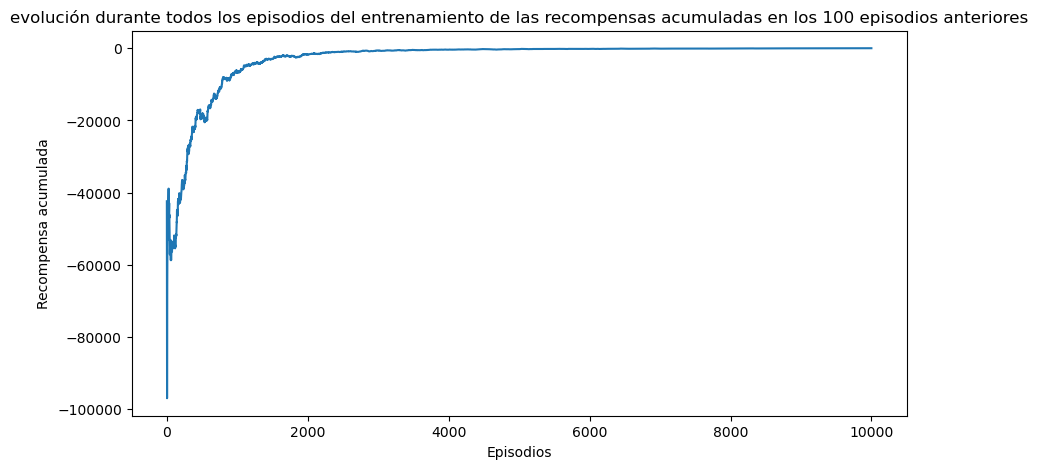

In [71]:
# ADD AND RUN YOUR CODE HERE
acumuladas = []
for i in range(len(rewards)):
    if i < 100:
        acumuladas.append(np.mean(rewards[:i+1]))
    else:
        acumuladas.append(np.mean(rewards[i-100:i+1]))
        
plt.figure(figsize=(10, 5))
plt.plot(acumuladas)
plt.xlabel('Episodios')
plt.ylabel('Recompensa acumulada')
plt.title('evolución durante todos los episodios del entrenamiento de las recompensas acumuladas en los 100 episodios anteriores')
plt.show()

In [83]:
rewards[:10]

[-42377, -108575, -80828, -155866, -3913, -54408, -13564, -9079, -34216, -3647]

In [82]:
rewards[-10:]

[-13, -13, -13, -13, -13, -13, -13, -13, -13, -13]

In [87]:
sorted(rewards, reverse=True)[:10]
# Reward
# Each time step incurs -1 reward, unless the player stepped into the cliff, which incurs -100 reward.

[-13, -13, -13, -13, -13, -13, -13, -13, -13, -13]

La gráfica refleja el proceso de aprendizaje del agente; después de una fase inicial de exploración y penalización breve, mejora eponencialmente su "aprendizaje", hasta alcanzar un comportamiento óptimo. Mas o menos sobre los 1000 episodios ya se aprecia como las recompensas tiene buenos valores.

La estabilización de las recompensas acumuladas sugiere que el agente ha aprendido a navegar el entorno de manera eficiente, evitando el precipicio y maximizando las recompensas. Cuando alcanza el valor -13, indica que en 13 movimientos ha alcanzado la meta, es decir la mejor puntuación posible.

Esto es un resultado esperado y positivo, mostrando que el algoritmo de aprendizaje por refuerzo ha sido exitoso en entrenar al agente en el entorno CliffWalking-v0.

**2.g) (1 PUNTO)** Visualiza el vídeo del último episodio del entrenamiento y muestra la tabla Q completa. Analiza detalladamente sus valores y cómo describe el comportamiento del agente resultante del entrenamiento. Utiliza ejemplos de estados y acciones concretos.

In [89]:
# ADD AND RUN YOUR CODE HERE
ipython_display('./videos/2e--episode-9999.mp4')

In [168]:
df = pd.DataFrame(q_table)
df.columns = ['UP', 'RIGHT', 'DOWN',  'LEFT']
df.head()

,UP,RIGHT,DOWN,LEFT
0,-7.941089,-7.712321,-7.712321,-7.941089
1,-7.712321,-7.458134,-7.458134,-7.941089
2,-7.458134,-7.175705,-7.175705,-7.712321
3,-7.175705,-6.861894,-6.861894,-7.458134
4,-6.861894,-6.513216,-6.513216,-7.175705


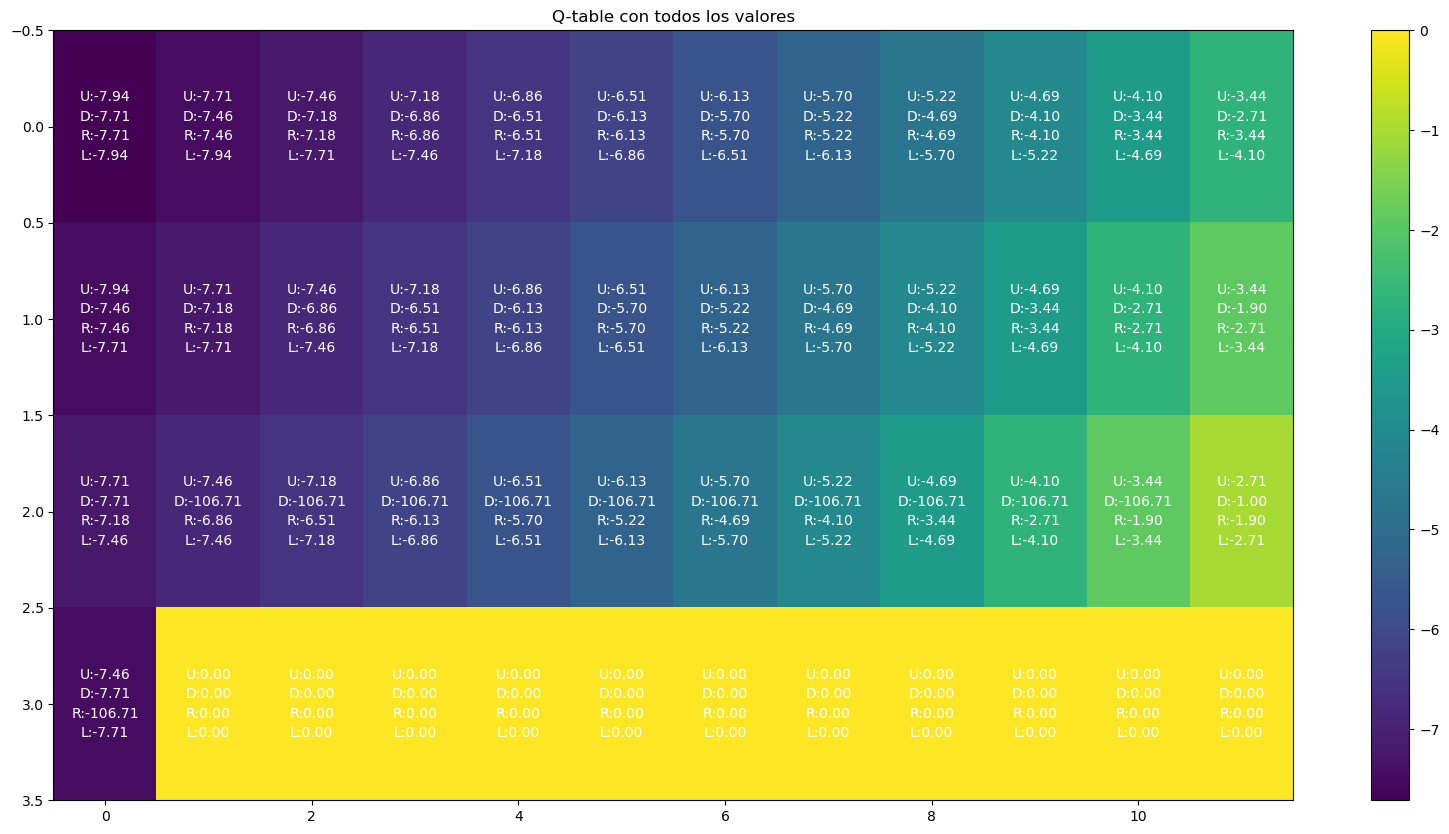

In [170]:
matriz_valores = df.max(axis=1).values.reshape((4, 12))

matriz_texto = df.apply(lambda row: f'U:{row.UP:.2f}\nD:{row.DOWN:.2f}\nR:{row.RIGHT:.2f}\nL:{row.LEFT:.2f}', axis=1)
matriz_texto = matriz_texto.values.reshape((4, 12))

# heatmap
plt.figure(figsize=(20, 10))
plt.imshow(matriz_valores, cmap='viridis', aspect='auto')

# valores
for i in range(matriz_texto.shape[0]):
    for j in range(matriz_texto.shape[1]):
        plt.text(j, i, matriz_texto[i, j], ha='center', va='center', color='white', fontsize=10, linespacing=1.5)

plt.colorbar()
plt.title('Q-table con todos los valores')
plt.show()
#TODO falta corregir eje Y

La tabla Q completa describe el comportamiento del agente en un entrenamiento con un entorno específico. Cada fila representa un estado del entorno, y cada columna representa una acción que el agente puede tomar en ese estado: UP, RIGHT, DOWN, LEFT [Enlace](https://gymnasium.farama.org/environments/toy_text/cliff_walking/#action-space) . Los valores en la tabla son valores Q, que indican la expectativa de recompensa para tomar una acción específica en un estado dado. Valores Q más altos sugieren que la acción es más preferible. La recompensa mínima es -1 que representa un paso(time step).

Mediante un mapa de calor se pueden ver donde está el acantilado y la posición final. En el estado inicial (0,0) de la matriz tenemos los valores *-7.941089	-7.712321	-7.712321	-7.941089*, los cuales indicas que tanto hacia abajo (2ºvalor) como derecha (3º valor) son los movimientos recomendados gracias al aprendizaje realizado.

Si atendemos a la tercera fila vemos que excepto la primera y última posición todos los valores de *Down* son los más elevados de (junto con el pimero de la última fila) que se corresponden con el moviento que "hace caer al abismo" al agente. Esto indica que ese movimiento se ha de evitar a toda costa, recomendando en todos ellos moverse a la **derecha**.

**2.h) (1 PUNTO)** Comenta las diferencias y principales entre el Aprendizaje Q y las redes Q profundas (***Deep Q-network***, DQN ).

* ¿Qué ventajas supone una técnica respecto a la otra?
* ¿Cómo soluciona DQN los problemas que puede presentar el uso de una función aproximadora y redes neuronales?
* ¿Crees que sería necesario utilizar DQN en el problema que hemos tratado en esta actividad?

El Aprendizaje Q y las Redes Q Profundas (DQN) son técnicas utilizadas en el aprendizaje por refuerzo que presentan diferencias significativas en su funcionamiento y aplicabilidad. Mientras que el *Aprendizaje Q* es eficiente y fácil de implementar en problemas con un **espacio de estados y acciones pequeño**, las *Redes Q Profundas* están diseñadas para manejar **problemas más complejos con un gran espacio de estados**, donde una tabla Q sería impracticable.

El Aprendizaje Q es particularmente adecuado para entornos simples debido a su simplicidad y eficiencia. Utiliza tablas Q para almacenar valores de recompensa esperados para cada par estado-acción, lo que permite al agente consultar rápidamente el mejor valor para cada acción en un estado concreto. Esta simplicidad hace que el Aprendizaje Q sea fácil de entender y aplicar en problemas donde el número de estados y acciones es manejable.

Por otro lado, las Redes Q Profundas (DQN) utilizan una red neuronal para *aproximar la función Q*, lo que permite generalizar los valores Q a partir de estados no visitados previamente. Esta capacidad de generalización es crucial para manejar problemas con espacios de estados muy grandes. Al reemplazar la tabla Q con una función aproximadora, las DQN son capaces de **escalar** a problemas más complejos y proporcionar soluciones más eficientes.

El uso de redes neuronales en el aprendizaje Q presenta desafíos, principalmente relacionados con la estabilidad del aprendizaje. Utilizar las últimas iteraciones para generar las muestras de aprendizaje significa que estas muestras no son independientes ni idénticamente distribuidas, lo que puede sesgar el entrenamiento. Además, el hecho de que el agente aprenda simultáneamente el valor ideal de Q y ajuste la red neuronal puede llevar a un proceso de aprendizaje inestable y difícil de controlar.

DQN aborda estos problemas con dos estrategias clave. Primero, utiliza una **memoria de experiencia** que almacena iteraciones pasadas. De esta memoria, se extraen aleatoriamente muestras para entrenar la red neuronal. Esto asegura que las muestras de aprendizaje sean más independientes y variadas, ayudando a estabilizar el proceso de aprendizaje. En segundo lugar, emplea **dos redes neuronales**. La primera red interactúa con el entorno y se actualiza constantemente, mientras que la segunda red, que se actualiza con menor frecuencia, se utiliza para modelar los valores Q ideales. Esto desacopla el aprendizaje de la política y la actualización de los valores Q, mitigando problemas de inestabilidad.

En el problema específico abordado en esta actividad, se aprendió una tabla Q con 48 valores. El Aprendizaje Q demostró ser suficiente para aprender un comportamiento óptimo. Dado el tamaño muy manejable del espacio de estados y acciones, la implementación de DQN no sería necesaria ni justificada. DQN es más adecuado para problemas donde el espacio de estados y acciones es tan grande que una tabla Q se vuelve impracticable. Por lo tanto, para este caso particular, el Aprendizaje Q es una solución más sencilla y eficaz.

En resumen, aunque DQN presenta soluciones robustas para problemas complejos mediante la utilización de memoria de experiencia y redes neuronales duales, en entornos más simples como el de esta actividad, el Aprendizaje Q sigue siendo una técnica adecuada y eficiente.

Referencia: https://towardsdatascience.com/reinforcement-learning-explained-visually-part-5-deep-q-networks-step-by-step-5a5317197f4b  Reinforcement Learning Explained Visually (Part 5): Deep Q Networks, step-by-step | by Ketan Doshi | Towards Data Science 